## Research Question 1 & 2 
### What main topics do western people associate China with? 
### How do these topics vary over time?

For this research questions, We would like to analyze which topics western public figures present when talking about China and how these topics change over time.
We use the result of KeyBert keyword extraction to have 5 possible keyword to represent each quotations, and in this notebook we analyze how these keywords distribuited.

In [1]:
import pandas as pd
import os
import glob

In [2]:
folder = '/Users/alex/EPFL/ADA/project/datas/new'
files = []
os.chdir(folder)
for file in glob.glob("*.bz2"):
    files.append(file)

### Get Bar Chart Race Plot 

To show keywords in different year, we decide to use a bar chart race plot to not only show different keywords in different years but also show how they changed over time. We use [flourish](https://flourish.studio/) to generate this plot, and we need to format the data to fit into the API. We expect a dataframe with keywords as index and quarters as columns, filling in the count result.

Here, we consider all five keywords when counting instead of the most possible one beacause some quotations can be about mutiple keywords and taking only one may leave out some information.

In [29]:
# tried on fist file to generate data
df_2017 = pd.read_json(files[0])
df_2017.head(5)

,quotationOffset,quoteID,numOccurrences,quotation,leftContext,rightContext,globalTopSpeaker,globalProbas,localTopSpeaker,localProbas,...,id,label,candidacy,type,religion,keywords,negative_sentiment,neutral_sentiment,positive_sentiment,max_sentiment
0,193,2014-01-02-044327,17,The Chinese helicopter has arrived at the Shok...,. The Australian Maritime Safety Authority (Am...,Turney tweeted. His posting was accompanied by...,Chris Turney,"[[Chris Turney, 0.7942], [None, 0.1851], [Xue ...",Chris Turney,"[[Chris Turney, 0.7734], [None, 0.193], [Xue L...",...,Q23461897,Chris Turney,None,item,None,"[[helicopter rescue, 0.5537000000000001], [arr...",0.001529,0.059781,0.938690,positive
1,190,2014-12-03-004065,26,And everybody's been impressed by his... clout...,". Obama, who met Xi last month in Beijing, tol...",But Obama said there were negative sides to Xi...,President Barack Obama,"[[President Barack Obama, 0.5926], [None, 0.36...",President Barack Obama,"[[President Barack Obama, 0.6271], [None, 0.34...",...,Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]","[[china morning, 0.4627], [inside china, 0.471...",0.077501,0.503023,0.419477,neutral
2,158,2014-12-03-020789,74,He has consolidated power faster and more comp...,. Photo: AP US President Barack Obama said on ...,"Obama said, referring to the man who led China...",President Barack Obama,"[[President Barack Obama, 0.6197], [None, 0.27...",President Barack Obama,"[[President Barack Obama, 0.6323], [None, 0.33...",...,Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]","[[consolidated power, 0.39640000000000003], [j...",0.032298,0.441353,0.526349,positive
3,458,2014-12-03-020770,15,He has been improvising himself into a nationa...,. The president said he was confident the Unit...,Obama said. Log in using your Facebook account,None,"[[None, 0.4906], [President Barack Obama, 0.40...",President Barack Obama,"[[President Barack Obama, 0.5873], [None, 0.37...",...,Q76,Barack Obama,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]","[[jinping consolidated, 0.3912], [nationalist ...",0.907279,0.086305,0.006416,negative
4,223,2014-01-17-037366,1,"It does seem ridiculous to fly back home, but ...",. April has her in Bulgaria for the junior wor...,she said. [QUOTE] This is what constitutes a l...,Steve Kiefer,"[[Steve Kiefer, 0.827], [None, 0.173]]",Steve Kiefer,"[[Steve Kiefer, 0.827], [None, 0.173]]",...,Q7613018,Steve Kiefer,None,item,None,"[[home school, 0.36310000000000003], [chicagot...",0.797962,0.177998,0.024040,negative


In [4]:
# get quarter columns
df_2017['quarter'] = df_2017['date'].apply(lambda x: (x.month - 1) // 3)
names = ['first', 'second', 'third', 'fourth']
ks = []
counts_total = pd.DataFrame([x[0] for y in df_2017['keywords'] for x in y])
counts_total = counts_total.drop_duplicates(subset=[0])
counts_total.set_index(0, inplace=True)

# group data by quarter and count values, then get top 20 keywords
for k, group in df_2017.groupby('quarter'):
    keywords = [x[0] for y in group['keywords'] for x in y]
    counts = pd.Series(keywords).value_counts().iloc[:20]

    counts_total = pd.merge(counts_total,
                            counts.rename(names[k]),
                            how='outer',
                            left_index=True,
                            right_index=True)
counts_total

,first,second,third,fourth
00 gallon,NaN,NaN,NaN,NaN
000 acres,NaN,NaN,NaN,NaN
000 americans,NaN,NaN,NaN,NaN
000 arthropod,NaN,NaN,NaN,NaN
000 associates,NaN,NaN,NaN,NaN
...,...,...,...,...
élan records,NaN,NaN,NaN,NaN
škoda automotive,NaN,NaN,NaN,NaN
škoda cars,NaN,NaN,NaN,NaN
škoda growth,NaN,NaN,NaN,NaN


In [5]:
counts_total = counts_total.dropna(how='all')
counts_total.fillna(0, inplace=True)
year = '2014'
counts_total.columns = year + counts_total.columns
counts_total.head(5)

/Users/alex/anaconda3/envs/myjupyter/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,2014first,2014second,2014third,2014fourth
alibaba ipo,0.0,0.0,85.0,0.0
antarctic ice,72.0,0.0,0.0,0.0
brooks fingers,0.0,0.0,66.0,0.0
china climate,0.0,0.0,0.0,178.0
china india,0.0,0.0,59.0,0.0


Define a function that used for different years to get all the results.

In [6]:
def get_count(data, year):
    data['quarter'] = data['date'].apply(lambda x: (x.month - 1) // 3)
    names = ['first', 'second', 'third', 'fourth']
    ks = []
    counts_total = pd.DataFrame([x[0] for y in data['keywords'] for x in y])
    counts_total = counts_total.drop_duplicates(subset=[0])
    counts_total.set_index(0, inplace=True)

    #print(counts_total)

    for k, group in data.groupby('quarter'):
        keywords = [y[0][0] for y in group['keywords']]
        counts = pd.Series(keywords).value_counts().iloc[:20]
        counts_total = pd.merge(counts_total,
                                counts.rename(names[k]),
                                how='outer',
                                left_index=True,
                                right_index=True)

    counts_total = counts_total.dropna(how='all')
    counts_total.fillna(0, inplace=True)
    counts_total.columns = year + counts_total.columns

    return counts_total

In [7]:
years = [
    '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
    '2017', '2018', '2020'
]

df = pd.DataFrame()
for y in years:
    path_to_out = f'/Users/alex/EPFL/ADA/project/datas/new/processed_western_quotes_{y}.json.bz2'
    df1 = pd.read_json(path_to_out)

    df2 = get_count(df1, y)
    if y == years[0]:
        df = df2
    else:
        df = df.merge(df2, how='outer', left_index=True, right_index=True)

df.fillna(0, inplace=True)

In [8]:
df_19 = pd.DataFrame()
for i in range(1, 5):
    path_to_out = f'/Users/alex/EPFL/ADA/project/datas/new/processed_western_quotes_2019-{i}.json.bz2'
    df1 = pd.read_json(path_to_out)
    df_19 = pd.concat([df_19, df1])

df2 = get_count(df_19, '2019')
df = df.merge(df2, how='outer', left_index=True, right_index=True)
df.fillna(0, inplace=True)

In [9]:
df.head(5)

,2008third,2008fourth,2009first,2009second,2009third,2009fourth,2010first,2010second,2010third,2010fourth,...,2018first,2018second,2018third,2018fourth,2020first,2020second,2019first,2019second,2019third,2019fourth
000 dead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010 olympics,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012 olympics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21st century,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby wambach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.to_csv('bar_racer.csv')

Then, we use the `bar_racer.csv` file to generate the bar chart race plot. 

You can access our plot by url: https://public.flourish.studio/visualisation/8094714/ 

### Get Keyword count analysis for all years

Then we can take a closer look at the keywords. To see how different keywords in years or different countries.

Firstly, we load all years' data together

In [11]:
years = [
    '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
    '2017', '2018', '2020'
]

df = pd.DataFrame()
for y in years:
    path_to_out = f'/Users/alex/EPFL/ADA/project/datas/new/processed_western_quotes_{y}.json.bz2'
    df1 = pd.read_json(path_to_out)

    df2 = df1[[
        'quoteID', 'date', 'id', 'date_of_birth', 'nationality', 'gender',
        'US_congress_bio_ID', 'party', 'label', 'keywords'
    ]]
    if y == years[0]:
        df = df2
    else:
        df = pd.concat([df, df2])

In [12]:
df_19 = pd.DataFrame()
for i in range(1, 5):
    path_to_out = f'/Users/alex/EPFL/ADA/project/datas/new/processed_western_quotes_2019-{i}.json.bz2'
    df1 = pd.read_json(path_to_out)
    df_19 = pd.concat([df_19, df1])

df2 = df_19[[
    'quoteID', 'date', 'id', 'date_of_birth', 'nationality', 'gender',
    'US_congress_bio_ID', 'party', 'label', 'keywords'
]]
df = pd.concat([df, df2])

In [13]:
df.shape

(1954147, 10)

In [14]:
df.to_csv('all_quotations_with_keyword.csv')

In [2]:
df_all = pd.read_csv(
    '/Users/alex/EPFL/ADA/project/datas/new/all_quotations_with_keyword.csv')

In [3]:
# change string into list
import ast
df_all['keywords'] = df_all['keywords'].apply(lambda x: ast.literal_eval(x))

In [4]:
# count the total
keywords_all = [x[0] for y in df_all['keywords'] for x in y]
dict_count = pd.Series(keywords_all).value_counts().to_dict()

In [5]:
temp = pd.DataFrame.from_dict(dict_count, orient='index')
temp.columns = ['counts']
temp['keywords'] = temp.index
temp.shape

(2469006, 2)

Plot for top 15 keywords.

In [9]:
import plotly.express as px
fg = px.bar(temp.iloc[:15],
            x="counts",
            y="keywords",
            color="keywords",
            color_discrete_sequence=px.colors.qualitative.G10,
            opacity=0.8,
            title="Top 15 Mentioned Keywords",
            labels={"counts": "Number of Mentions"})

fg.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'showlegend': False
})
fg.show()
fg.write_html("keyword_top15.html")

Plot for top 1000 keywords.

In [24]:
import plotly.express as px
fg = px.bar(
    temp.iloc[:1000],
    y="counts",
    x="keywords",
    #color="keywords",
    color_discrete_sequence=px.colors.qualitative.G10,
    opacity=0.8,
    title="Top 15 Mentioned Keywords",
    labels={"counts": "Number of Mentions"})

fg.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'showlegend': False
})
fg.show()
#fg.write_html("keyword_top1000.html")

Top 100 keywords word cloud

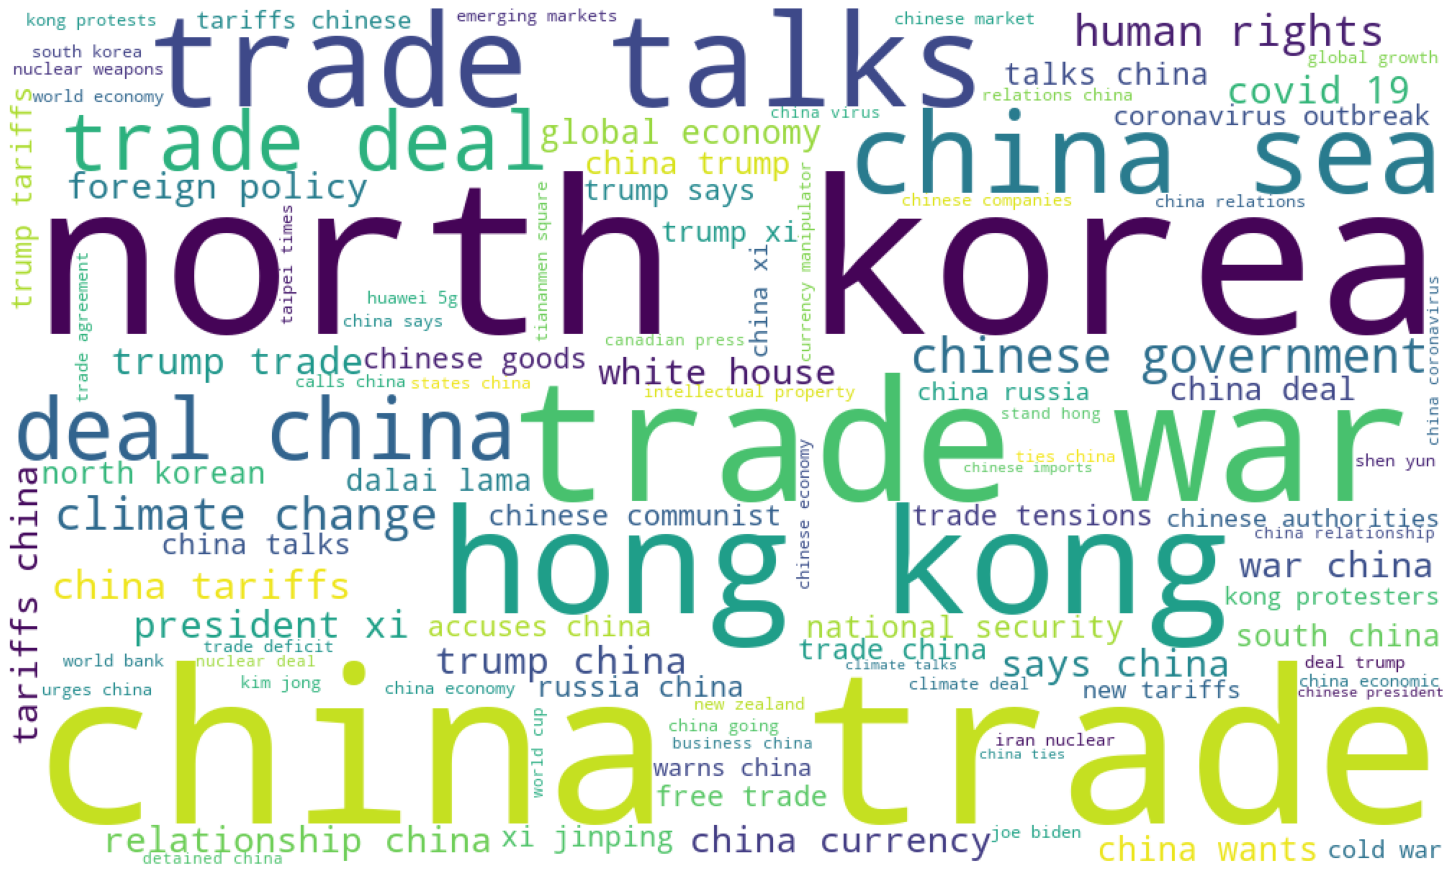

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",
               width=1000,
               height=600,
               max_words=100,
               relative_scaling=0.5,
               normalize_plurals=False).generate_from_frequencies(dict_count)
plt.figure(figsize=(20, 15))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('keyword-World_Cloud.png')
plt.show()

For the top 5 countries with most quotations, we would like to see if there are any differences in their top mentioned keywords.

In [5]:
#get top 5 countries
top_5 = df_all.groupby('nationality').count().sort_values(
    'id', ascending=False).iloc[:5].index.values
top_5

array(["['Q30']", "['Q145']", "['Q408']", "['Q16']", "['Q142']"],
      dtype=object)

Here we get most-mentioned keywords and their counts for these countries.

For canadian keywords, the top 5 keywords contain:`'news canadian','canadian press'`, which looks like some press or newspaper name and don't make much sense. So, we skip these two and rank the rest.

In [7]:
import numpy as np
i = 0
df_nation_counts = pd.DataFrame()

keyword_useless = ['news canadian', 'canadian press']
for k, group in df_all.groupby('nationality'):
    if k in top_5:

        keywords_all = [x[0] for y in group['keywords'] for x in y]
        if k == "['Q16']":
            keywords_all = [
                x for x in keywords_all if x not in keyword_useless
            ]
        dict_count = pd.Series(keywords_all).value_counts()
        df1 = pd.DataFrame(dict_count.head(5))
        df1['nationality'] = k
        if i == 0:
            df_nation_counts = df1
            i += 1
        else:
            df_nation_counts = pd.concat([df_nation_counts, df1])

df_nation_counts.head(5)

,0,nationality
global economy,777,['Q142']
trade war,750,['Q142']
world economy,668,['Q142']
trade tensions,662,['Q142']
global growth,661,['Q142']


Generate the dataframe

In [8]:
di = {
    "['Q142']": 'France',
    "['Q145']": 'UK',
    "['Q16']": 'Canada',
    "['Q30']": 'USA',
    "['Q408']": 'Australia'
}
top_5_count = df_all.groupby('nationality').count().sort_values(
    'id', ascending=False).id.iloc[:5].to_dict()

df_nation_counts.columns = ['counts', 'nationality']
df_nation_counts['keyword'] = df_nation_counts.index
df_nation_counts['total count'] = df_nation_counts['nationality'].values
df_nation_counts = df_nation_counts.replace({"nationality": di})
df_nation_counts = df_nation_counts.replace({"total count": top_5_count})
df_nation_counts['percentage'] = df_nation_counts['counts'] / df_nation_counts[
    'total count']
df_nation_counts.sort_values(['nationality'], ascending=False, inplace=True)
df_nation_counts.sort_values(['counts'], ascending=False, inplace=True)
df_nation_counts

,counts,nationality,keyword,total count,percentage
north korea,36053,USA,north korea,1185590,0.030409
china trade,35752,USA,china trade,1185590,0.030155
trade war,18778,USA,trade war,1185590,0.015839
trade talks,15277,USA,trade talks,1185590,0.012886
hong kong,12725,USA,hong kong,1185590,0.010733
hong kong,2142,UK,hong kong,156735,0.013666
china sea,1628,Australia,china sea,106595,0.015273
detained china,1290,Canada,detained china,94181,0.013697
huawei 5g,1167,UK,huawei 5g,156735,0.007446
china sea,1051,UK,china sea,156735,0.006706


In [12]:
import plotly.express as px

fg = px.bar(
    df_nation_counts,
    x='counts',
    y="keyword",
    color="nationality",
    text='counts',
    color_discrete_sequence=px.colors.qualitative.G10,
    #barmode='group',
    opacity=0.8,
    title="Top 5 Mentioned Keywords in Top 5 Countries",
    labels={'counts': "Number of Mentions"})

fg.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fg.show()
#fg.write_html("keywords_countries.html")

In [13]:
top_5 = df_nation_counts.nationality.unique()
top_5

array(['USA', 'UK', 'Australia', 'Canada', 'France'], dtype=object)

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1,
                    cols=5,
                    subplot_titles=("USA", "UK", "Australia", "Canada",
                                    "France"),
                    shared_yaxes=True)
i = 1
for x in top_5:
    df = df_nation_counts[df_nation_counts['nationality'] == x]
    fig.add_trace(go.Bar(y=df.counts, x=df.keyword, name=x), row=1, col=i)
    i += 1

fig.update_layout(
    title_text=
    "Top 5 mentioned keywords for top 5 countries with most quotations",
    xaxis_title='keywords',
    yaxis_title='Number of Mentions')
fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

fig.update_yaxes(type="log")

fig.show()
fig.write_html("keywords_countries.html")

We also wonder if there are any difference in gender? So we checked the two main gender: male and female.

In [30]:
gender_2 = ["['Q6581097']", "['Q6581072']"]
df_gender = df_all[df_all['gender'].isin(gender_2)]
df_gender['gender'] = df_gender.gender.str.strip("['']")
df_gender.gender.value_counts()

<ipython-input-30-8d980d37c4c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['gender'] = df_gender.gender.str.strip("['']")


Q6581097    1622387
Q6581072     329911
Name: gender, dtype: int64

In [33]:
import numpy as np
i = 0
df_gender_counts = pd.DataFrame()
gender_2 = ['Q6581097', 'Q6581072']

for k, group in df_gender.groupby('gender'):
    keywords_all = [x[0] for y in group['keywords'] for x in y]
    dict_count = pd.Series(keywords_all).value_counts().iloc[:15]
    df1 = pd.DataFrame(dict_count.head(5))
    df1['gender'] = k
    if i == 0:
        df_gender_counts = df1
        i += 1
    else:
        df_gender_counts = pd.concat([df_gender_counts, df1])

df_gender_counts

,0,gender
north korea,6819,Q6581072
hong kong,4920,Q6581072
human rights,2608,Q6581072
china sea,2336,Q6581072
china trade,2156,Q6581072
china trade,37630,Q6581097
north korea,33222,Q6581097
trade war,21480,Q6581097
hong kong,16142,Q6581097
trade talks,15616,Q6581097


It turns out that there are not such big different between genders. 